Comparing Dijkstra and Bellman Ford Shortest Paths Algorithms using PyDataStructs
====================================

Dataset
-------

We have used [California road network](https://snap.stanford.edu/data/roadNet-CA.html) from [Stanford Network Analysis Project](https://snap.stanford.edu/index.html). The intent of this demo is to show how **pydatastructs** can be used for research and analysis purposes.

The above dataset is a road network of California as the name suggests. The intersections and endpoints in this network are represented as vertices and the roads between them are represented as undirected edges. The data is read from a `txt` file where each line contains two numbers representing two points of an edge in the graph. We have used varying number of these edges to analyse how each algorithm responds to the varying scale of the shortest path problem at hand.

Results
-------

We observed that for low inverse density (total number of possible edges divided by number of edges present) graphs, both algorithms take similar amounts of time. However Dijkstra algorithm performs significantly better with high inverse density graphs as compared to Bellman Ford algorithm.

In [ ]:
# Import modules and APIs for Graphs
from pydatastructs import Graph, AdjacencyListGraphNode
from pydatastructs import shortest_paths, topological_sort

# Import utility modules
import timeit, random, functools, matplotlib.pyplot as plt

In [ ]:
def create_Graph(num_edges, file_path, ignore_lines=4):
    """
    Creates pydatastructs.Graph object.

    Parameters
    ==========

    num_edges: int
        Number of edges that should be present in the
        pydatastructs.Graph object.
    file_path: str
        The path to the file containing California
        road network dataset.
    ignore_lines: int
        Number of inital lines that should be ignored.
        Optional, by default 4 because the first 4 lines
        contain documentation of the dataset which is not
        required to generate the pydatastructs.Graph object.
    
    Returns
    =======

    G: pydatastructs.Graph
    """
    f = open(file_path, 'r')
    for _ in range(ignore_lines):
        f.readline()
    G = Graph()
    inp = f.readline().split()
    for _ in range(num_edges):
        u, v = inp
        G.add_vertex(AdjacencyListGraphNode(u))
        G.add_vertex(AdjacencyListGraphNode(v))
        G.add_edge(u, v, random.randint(1, 1000)) 
        inp = f.readline().split()
    return G

In [ ]:
def generate_data(file_name, min_num_edges, max_num_edges, increment):
    """
    Generates computation time data for Dijkstra and Bellman ford
    algorithms using pydatastructs.shortest_paths.

    Parameters
    ==========

    file_path: str
        The path to the file containing California
        road network dataset.
    min_num_edges: int
        The minimum number of edges to be used for
        comparison of algorithms.
    max_num_edges: int
        The maximum number of edges to be used for comparison
        of algorithms.
    increment: int
        The value to be used to increment the scale of the
        shortest path problem. For example if using 50 edges,
        and increment value is 10, then in the next iteration,
        60 edges will be used and in the next to next iteration,
        70 edges will be used and so on until we hit the max_num_edges
        value.

    Returns
    =======

    graph_data, data_dijkstra, data_bellman_ford: (list, list, list)
        graph_data contains tuples of number of vertices and number
        of edges.
        data_dijkstra contains the computation time values for each
        graph when Dijkstra algorithm is used.
        data_bellman_ford contains the computation time values for each
        graph when Bellman ford algorithm is used.    
    """
    data_dijkstra, data_bellman_ford, graph_data = [], [], []
    for edge in range(min_num_edges, max_num_edges + 1, increment):
        G = create_Graph(edge, file_name)
        t = timeit.Timer(functools.partial(shortest_paths, G, 'dijkstra', '1'))
        t_djk = t.repeat(1, 1)
        t = timeit.Timer(functools.partial(shortest_paths, G, 'bellman_ford', '1'))
        t_bf = t.repeat(1, 1)
        graph_data.append((len(G.vertices), len(G.edge_weights)))
        data_dijkstra.append(t_djk[0])
        data_bellman_ford.append(t_bf[0])
    return graph_data, data_dijkstra, data_bellman_ford

In [ ]:
def plot_data(graph_data, data_dijkstra, data_bellman_ford):
    """
    Utility function to plot the computation time values
    for Dijkstra and Bellman ford algorithms versus
    the inverse density of the input graph.
    """
    idensity, time_dijkstra, time_bellman_ford = [], [], []
    for datum_graph, datum_djk, datum_bf in zip(graph_data, data_dijkstra, data_bellman_ford):
        num_edges, num_vertices = datum_graph[1], datum_graph[0]
        idensity.append((num_vertices*(num_vertices - 1))/(2*num_edges))
        time_dijkstra.append(datum_djk)
        time_bellman_ford.append(datum_bf)
    plt.xlabel("Inverse Density of Input Graph")
    plt.ylabel("Computation Time (s)")
    plt.plot(idensity, time_dijkstra, label="Dijkstra")
    plt.plot(idensity, time_bellman_ford, label="Bellman Ford")
    plt.legend(loc="best")
    plt.show()

In [ ]:
graph_data, data_djk, data_bf = generate_data('roadNet-CA.txt', 50, 2000, 50)

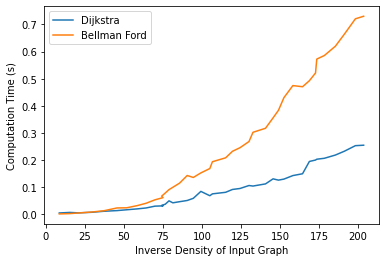

In [ ]:
plot_data(graph_data, data_djk, data_bf)